# Clustering Weather Stations in Sri Lanka Based on Climatic Data
## (unsupervised machine learning)

### Introduction

In recent years, the use of data-driven techniques for analyzing and classifying environmental and climatic data has gained significant attention. One such technique is clustering, a form of unsupervised machine learning that groups similar data points together based on their features. The objective of this project is to cluster weather stations in Sri Lanka based on their climatic data, specifically focusing on parameters such as temperature, rainfall, and altitude.

Sri Lanka, a tropical island with varying climatic conditions, hosts multiple weather stations across its regions. These stations gather data related to monthly rainfall, maximum and minimum temperatures, and other important meteorological parameters. However, this data, when analyzed as individual records, may not reveal the hidden patterns or relationships between the stations. The main goal of this project is to group these stations into clusters that share similar climatic characteristics, thus facilitating a better understanding of the geographic and climatic variability in Sri Lanka.

The final objective of this project is to provide a comprehensive understanding of the regional climatic variations in Sri Lanka by categorizing the weather stations into distinct clusters. The clustering results can potentially aid in environmental planning, resource management, and even agricultural decision-making by identifying similar weather zones.

### Methodology

The methodology for this project follows a structured approach that includes data preprocessing, dimensionality reduction, clustering, and evaluation. The steps taken to achieve the objectives of clustering the 18 weather stations in Sri Lanka are outlined below.

#### 1.Data Collection and Preprocessing

The dataset consists of two parts:

Dataset 1: contains monthly data for each weather station, including the station name, year, month, monthly total rainfall, monthly average Tmax, and monthly average Tmin.

Dataset 2: contains geographical data for each station, including latitude, longitude, and altitude.

#### a.Data Merging:
To combine the two datasets, we merged Dataset 1 (monthly data) with Dataset 2 (geographical data) based on the common station name. This step created a unified dataset with both the meteorological and geographical information for each weather station.

#### b.Conversion of Monthly Data to Annual Data

Since the dataset provided monthly data for each station, we aggregated this data into annual summaries to simplify the analysis. The following steps were taken:

##### Annual Rainfall: The monthly total rainfall was summed for each station over the course of a year.

##### Annual Temperature: The monthly Tmax and monthly Tmin values were averaged for each station over the course of a year.

This aggregation transformed the data from monthly granularity into annual data, reducing the complexity of the dataset and making it more suitable for clustering analysis.

#### c.Data Quality Checks and Handling:
To ensure data integrity, missing values were imputed using the mean or median, and rows with excessive missing values were removed. Duplicate entries were identified and removed to avoid overrepresentation. Outliers were detected using the Interquartile Range (IQR) method and z-scores, and extreme outliers were either capped or removed to maintain data consistency and ensure reliable clustering results.

#### d.Data Standardization
To ensure that all features contributed equally to the clustering process, the dataset was standardized. Standardization involves scaling the data such that each feature has a mean of 0 and a standard deviation of 1. This step was necessary because clustering algorithms are sensitive to the scale of the data, and features with larger scales (such as altitude or rainfall) could disproportionately influence the clustering results.

#### e.Dimensionality Reduction Using PCA
Given the potential multicollinearity in the dataset, where some features were highly correlated (e.g., Tmax and Tmin), Principal Component Analysis (PCA) was applied. PCA is a technique used to reduce the dimensionality of the data while retaining the most significant variance.

PCA was performed on the standardized dataset, and the number of principal components retained was determined based on the cumulative explained variance. In this case, the first four components were retained, as they collectively explained over 90% of the total variance in the dataset.

#### 2.Exploratory Data Analysis (EDA)

In the Exploratory Data Analysis (EDA) phase, we performed various visualizations and statistical analyses to understand the structure, distribution, and relationships within the dataset. Distribution plots (histograms with KDE) were used to examine the spread and skewness of numerical features such as annual rainfall, maximum and minimum temperatures, and altitude. These plots provided insights into the data's distribution patterns, helping identify features with skewed distributions. Additionally, a pairplot was used to visualize the pairwise relationships between numerical features, offering a deeper understanding of how features correlate with each other. Together, these visualizations allowed us to assess data quality, detect potential outliers, and uncover patterns that would guide further analysis and clustering.

#### 3. Clustering the Stations

After dimensionality reduction, clustering techniques were applied to group the 18 weather stations into clusters with similar climatic characteristics. Two clustering methods were considered:

K-Means Clustering: K-Means was used to partition the stations into a pre-specified number of clusters. The optimal number of clusters was determined using the Elbow Method and Silhouette Score, which helped identify the best k for meaningful clusters.

Hierarchical Clustering: In addition to K-Means, Hierarchical Clustering (Agglomerative Clustering) was used to provide a more flexible approach for identifying clusters. A dendrogram was plotted to visualize the hierarchical relationships between stations, allowing us to cut the tree at the appropriate level to determine the number of clusters.

### Results and Discussion

In [169]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [171]:
# Import data set
data = pd.read_excel("Annual.xlsx")

In [173]:
# Load data set
data.head()

,Station name,Year,Latitude,Longitude,Altitude,Annual rainfall,Annual_Tmax,Annual_Tmin
0,Anuradhapura,1984,8.35,80.38,81.0,2313.000000,31.897274,23.594465
1,Anuradhapura,1985,8.35,80.38,81.0,1632.300000,32.420329,23.622797
2,Anuradhapura,1986,8.35,80.38,81.0,1632.051697,32.575939,23.609802
3,Anuradhapura,1987,8.35,80.38,81.0,1358.900000,33.350653,23.681237
4,Anuradhapura,1988,8.35,80.38,81.0,1250.800000,33.144466,23.783476


In [175]:
# Check the number of rows and columns in dataset
data.shape

(648, 8)

##### After we convert monthly data into annual our data set have 648 rows and 8 columns.

In [178]:
# Check the columns type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station name     648 non-null    object 
 1   Year             648 non-null    int64  
 2   Latitude         648 non-null    float64
 3   Longitude        648 non-null    float64
 4   Altitude         648 non-null    float64
 5   Annual rainfall  648 non-null    float64
 6   Annual_Tmax      648 non-null    float64
 7   Annual_Tmin      648 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 40.6+ KB


##### In our data set have one categorical column and 7 numrical columns.

In [181]:
# Convert the 'Year' column to object (string) type
data['Year'] = data['Year'].astype('object')

# Verify the change by checking the data type of the 'Year' column
print(data['Year'].dtype)


object


In [183]:
# Check the column name
data.columns

Index(['Station name', 'Year', 'Latitude', 'Longitude', 'Altitude',
       'Annual rainfall', 'Annual_Tmax', 'Annual_Tmin'],
      dtype='object')

In [185]:
data.describe()

,Latitude,Longitude,Altitude,Annual rainfall,Annual_Tmax,Annual_Tmin
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,7.569074,80.602222,208.062222,1832.897678,30.774221,23.033576
std,0.969867,0.569931,438.553910,683.781320,2.801348,3.196295
min,6.033333,79.866670,5.000000,636.285087,19.402717,11.436228
25%,6.900000,80.216670,8.000000,1386.148031,30.682786,23.049216
50%,7.401666,80.455000,49.215000,1736.300000,31.435609,23.970019
75%,8.350000,81.050000,116.000000,2129.282160,32.209636,24.790417
max,9.680000,81.830000,1868.000000,4710.600000,33.725920,32.247668


In [187]:
data.isnull().sum()

Station name       0
Year               0
Latitude           0
Longitude          0
Altitude           0
Annual rainfall    0
Annual_Tmax        0
Annual_Tmin        0
dtype: int64

##### In here our data set does not have missig values.

In [190]:
data.duplicated().sum()

0

#### In here our data set does not have duplicate values.


In [193]:
data["Station name"].value_counts()

Station name
Anuradhapura       36
Badulla            36
Trincomalee        36
Rathnapura         36
Pothuvil           36
Nuwaraeliya        36
Mannar             36
Mahailuppallama    36
Kurunegala         36
Katunayaka         36
Katugasthota       36
Jaffna             36
Hambanthota        36
Galle              36
Colombo            36
Batticaloa         36
Batalagoda         36
Vauniya            36
Name: count, dtype: int64

In [195]:
len(data["Station name"].value_counts())

18

###### our data set have 18 stations.

In [198]:
data["Year"].value_counts()

Year
1984    18
1985    18
2004    18
2005    18
2006    18
2007    18
2008    18
2009    18
2010    18
2011    18
2012    18
2013    18
2014    18
2015    18
2016    18
2017    18
2018    18
2003    18
2002    18
2001    18
1992    18
1986    18
1987    18
1988    18
1989    18
1990    18
1991    18
1993    18
2000    18
1994    18
1995    18
1996    18
1997    18
1998    18
1999    18
2019    18
Name: count, dtype: int64

In [200]:
len(data["Year"].value_counts())

36

##### The data set has 36 years data.

### Exploratory Data Analysis (EDA)

#### The distribution plots 

##### The distribution plots (histograms with KDE) are used to visualize how the values of numerical features are distributed. This allows us to identify whether the features follow a normal distribution, are skewed, or have any unusual patterns.

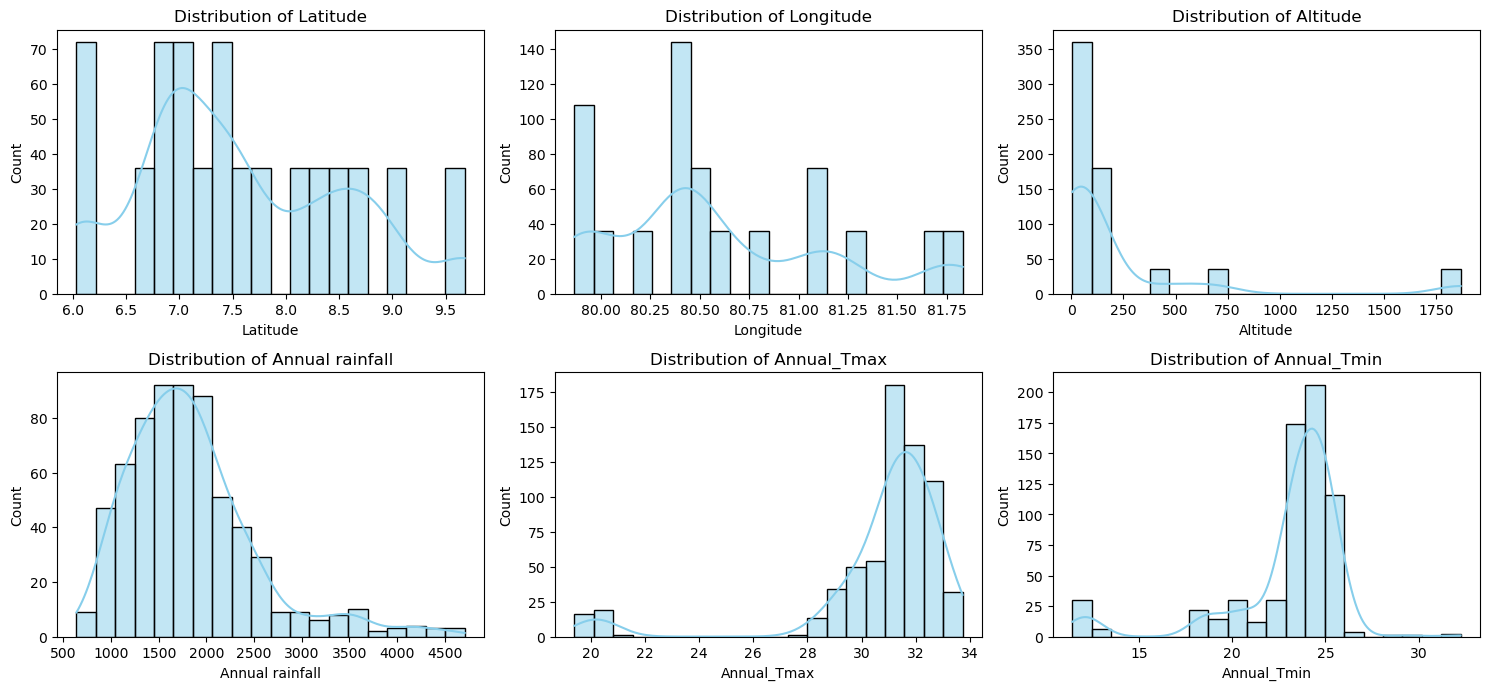

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in the dataset
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and KDE for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the layout based on the number of features
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


The distribution plots provide insights into the characteristics of various features in the dataset. Latitude and Longitude show that the stations are primarily concentrated in specific geographic regions of Sri Lanka. Altitude is highly skewed, with most stations located at lower elevations, while Annual Rainfall is right-skewed, indicating a higher frequency of lower rainfall values. The distributions of Annual Tmax and Annual Tmin suggest that temperatures are generally clustered around 30°C and 20°C, respectively, with some stations experiencing extreme values, likely due to geographical factors like altitude or proximity to the coast. These visualizations highlight the variability in climatic conditions across different stations in Sri Lanka.

#### The pairplot

##### The pairplot helps in visualizing pairwise relationships between numerical features. It shows how each feature relates to others and highlights any potential linear or non-linear patterns between them.

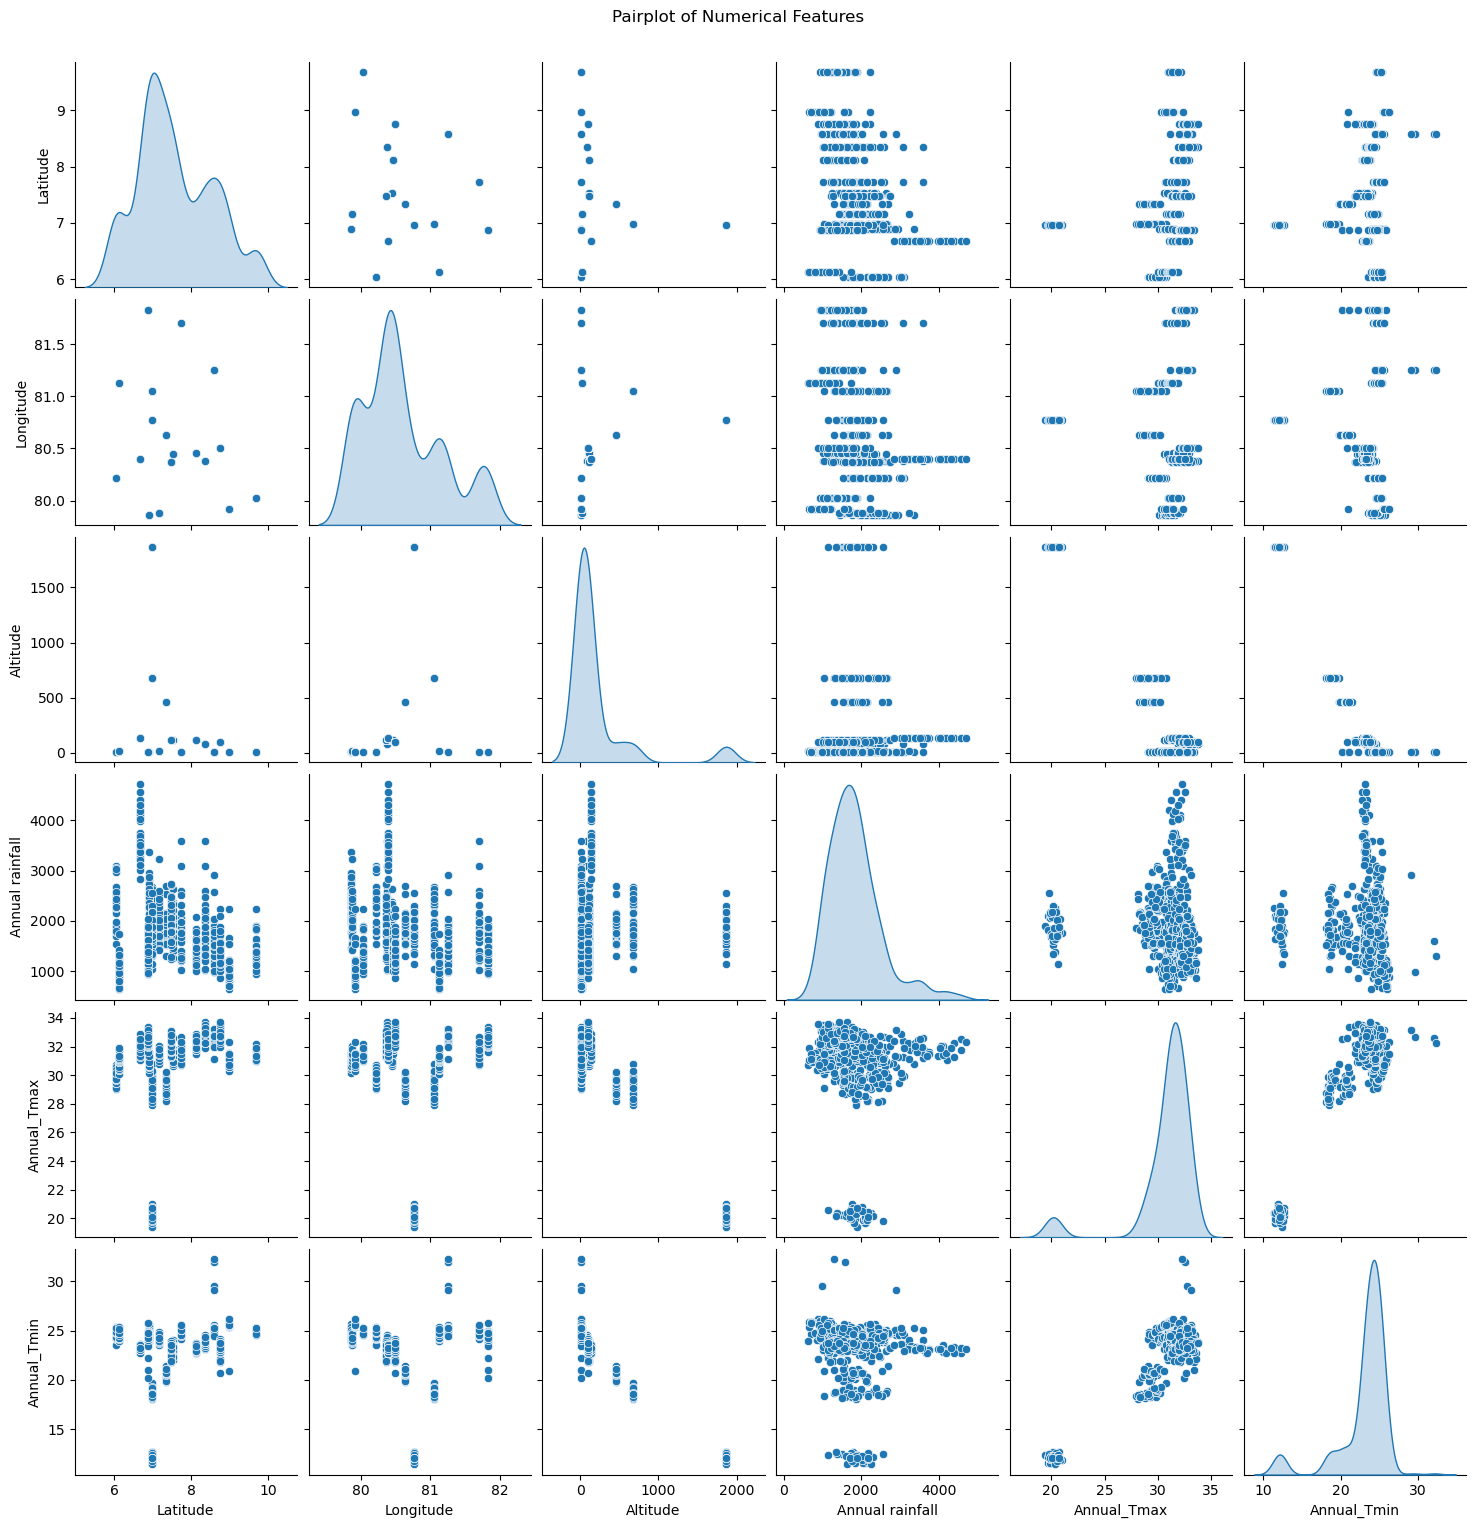

In [210]:
# Visualize pairwise relationships between features
sns.pairplot(data[numerical_cols], diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


#### correlation_matrix

In [212]:
# Select only numeric columns from the dataframe
numeric_columns = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


                 Latitude  Longitude  Altitude  Annual rainfall  Annual_Tmax  \
Latitude         1.000000  -0.213676 -0.201460        -0.381825     0.300183   
Longitude       -0.213676   1.000000  0.114449        -0.186588    -0.024331   
Altitude        -0.201460   0.114449  1.000000         0.052127    -0.931774   
Annual rainfall -0.381825  -0.186588  0.052127         1.000000    -0.059113   
Annual_Tmax      0.300183  -0.024331 -0.931774        -0.059113     1.000000   
Annual_Tmin      0.256118  -0.120227 -0.960141        -0.097939     0.864830   

                 Annual_Tmin  
Latitude            0.256118  
Longitude          -0.120227  
Altitude           -0.960141  
Annual rainfall    -0.097939  
Annual_Tmax         0.864830  
Annual_Tmin         1.000000  


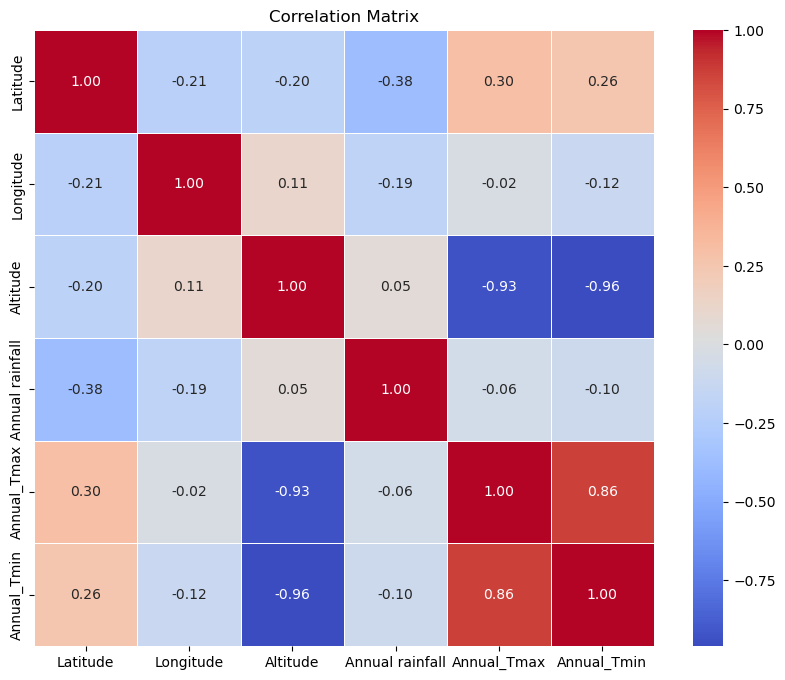

In [213]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals several important relationships between the features in the dataset. Latitude and Longitude exhibit a weak negative correlation, suggesting a slight inverse relationship between the two. Altitude shows weak correlations with both Latitude and Longitude, indicating that the geographic position does not strongly influence the elevation of the stations. A notable finding is the strong negative correlation between Altitude and both Annual Tmax and Annual Tmin, which suggests that stations at higher altitudes tend to have cooler temperatures. Annual Rainfall has a weak positive correlation with Annual Tmin, indicating that stations with higher rainfall tend to experience slightly higher minimum temperatures, but there is no significant relationship between rainfall and maximum temperature. Lastly, there is a strong positive correlation between Annual Tmax and Annual Tmin, as expected, reflecting that stations with higher maximum temperatures also tend to have higher minimum temperatures. These correlations help in understanding the climatic patterns and relationships across the weather stations.

### Standardize the data

Since the dataset contains features measured in different units, such as latitude and longitude in degrees, altitude in meters, annual rainfall in millimeters, and temperature in Celsius, it was necessary to standardize the data before applying clustering techniques. Standardization ensures that each feature contributes equally to the analysis, regardless of its scale or unit of measurement.

In [218]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

### Principal component analysis(PCA)

The strong correlations observed between certain features in the dataset indicate the presence of multicollinearity. Specifically, the negative correlations between Altitude and both Annual Tmax (-0.93) and Annual Tmin (-0.96) suggest that higher altitude stations tend to have lower temperatures. This strong relationship between altitude and temperature introduces multicollinearity, as both variables are highly correlated and convey similar information. Additionally, the strong positive correlation (0.86) between Annual Tmax and Annual Tmin indicates that stations with higher maximum temperatures also tend to experience higher minimum temperatures, further contributing to multicollinearity. To mitigate this, one approach is to reduce dimensionality using techniques such as Principal Component Analysis (PCA)

In [221]:
# Apply PCA to the scaled data
pca = PCA()  # Fit PCA with all components
principal_components = pca.fit_transform(scaled_data)

In [222]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [223]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [224]:
# Print the cumulative explained variance
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance)

Cumulative Explained Variance Ratio: [0.49569222 0.71183272 0.8972889  0.97699107 0.9970172  1.        ]


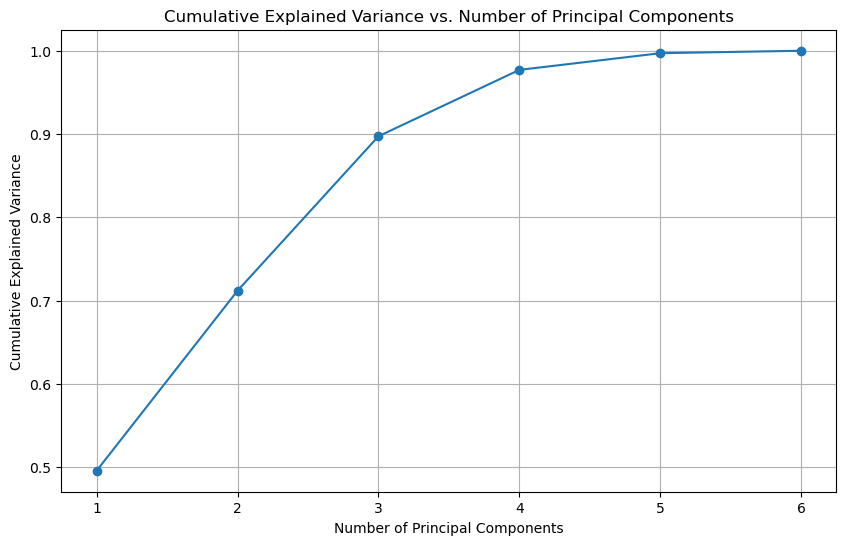

In [225]:
# Plot the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [226]:
# Determine how many components to select (e.g., for 90% variance)
components_to_select = next(i for i, total_variance in enumerate(cumulative_explained_variance) if total_variance >= 0.90) + 1
print(f"Number of components to explain 90% of variance: {components_to_select}")

Number of components to explain 90% of variance: 4


In [227]:
# Now apply PCA again with the selected number of components
pca = PCA(n_components=components_to_select)
principal_components = pca.fit_transform(scaled_data)

In [228]:
# Create a DataFrame with the selected principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(components_to_select)])

In [229]:
pca_df.head()

,PC1,PC2,PC3,PC4
0,-0.641821,0.253387,-0.703845,0.770688
1,-0.845860,-0.497560,-0.522705,0.200227
2,-0.874144,-0.493342,-0.515768,0.208797
3,-1.077192,-0.774874,-0.415684,0.007411
4,-1.069873,-0.900107,-0.398041,-0.102514


In [230]:
# Add the principal components to the original dataset (keeping Station and Year)
df_with_pca = data.copy()  # Copy the original data
df_with_pca[['PC1', 'PC2', 'PC3', 'PC4']] = pca_df  # Add the new principal components


In [231]:
df_with_pca.head()

,Station name,Year,Latitude,Longitude,Altitude,Annual rainfall,Annual_Tmax,Annual_Tmin,PC1,PC2,PC3,PC4
0,Anuradhapura,1984,8.35,80.38,81.0,2313.000000,31.897274,23.594465,-0.641821,0.253387,-0.703845,0.770688
1,Anuradhapura,1985,8.35,80.38,81.0,1632.300000,32.420329,23.622797,-0.845860,-0.497560,-0.522705,0.200227
2,Anuradhapura,1986,8.35,80.38,81.0,1632.051697,32.575939,23.609802,-0.874144,-0.493342,-0.515768,0.208797
3,Anuradhapura,1987,8.35,80.38,81.0,1358.900000,33.350653,23.681237,-1.077192,-0.774874,-0.415684,0.007411
4,Anuradhapura,1988,8.35,80.38,81.0,1250.800000,33.144466,23.783476,-1.069873,-0.900107,-0.398041,-0.102514


The cumulative explained variance plot indicated that the first four principal components accounted for approximately 90% of the total variance, which was sufficient for capturing the most significant patterns in the data. The remaining components explained only a small fraction of the variance, suggesting that they would not contribute much to the analysis. As a result, the dataset was transformed into four principal components, significantly reducing its dimensionality while retaining key information. These components were then used for clustering and further analysis, providing a more efficient representation of the data.

### K-Means clustering

In [234]:
# Use the Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):  # Check for k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

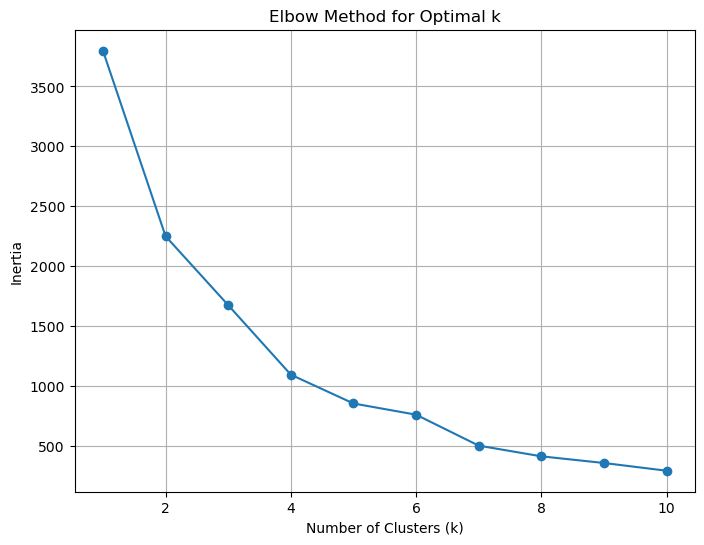

In [235]:
# Plot the inertia for each value of k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [236]:
# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):  # Silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

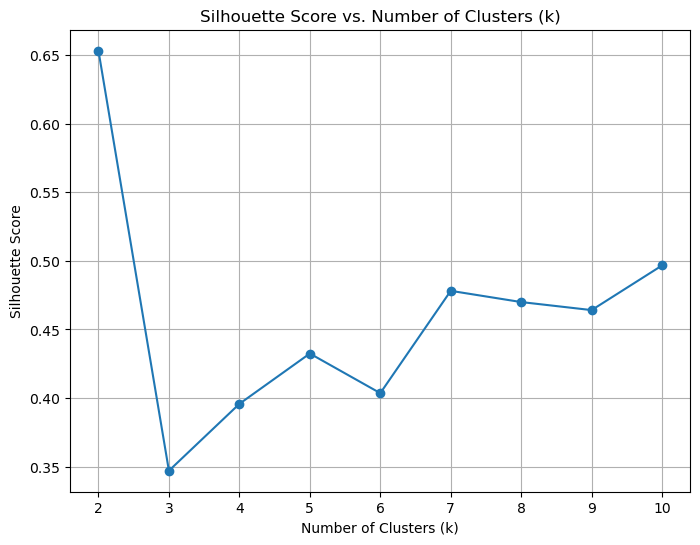

In [237]:
# Plot the silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [292]:
# Based on the Elbow Method and Silhouette Score, choose the optimal k (e.g., k=3)
optimal_k = 10 # Adjust this based on the above methods

In [294]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_df)

In [296]:
# Display the stations and their corresponding cluster labels
print(data[['Station name', 'Cluster']].sort_values('Cluster'))

    Station name  Cluster
223  Hambanthota        0
243  Hambanthota        0
242  Hambanthota        0
240  Hambanthota        0
239  Hambanthota        0
..           ...      ...
597  Trincomalee        9
596  Trincomalee        9
595  Trincomalee        9
601  Trincomalee        9
593  Trincomalee        9

[648 rows x 2 columns]


In [298]:
# Group by 'Station name' and find the most frequent cluster for each station
station_clusters = data.groupby('Station name')['Cluster'].agg(lambda x: x.mode()[0]).reset_index()

# Display the resulting DataFrame with one cluster per station
print(station_clusters)


       Station name  Cluster
0      Anuradhapura        3
1           Badulla        4
2        Batalagoda        8
3        Batticaloa        6
4           Colombo        1
5             Galle        1
6       Hambanthota        0
7            Jaffna        7
8      Katugasthota        4
9        Katunayaka        1
10       Kurunegala        8
11  Mahailuppallama        3
12           Mannar        7
13      Nuwaraeliya        2
14         Pothuvil        6
15       Rathnapura        5
16      Trincomalee        9
17          Vauniya        3


In [300]:
stations_in_cluster_0 = station_clusters[station_clusters['Cluster'] == 0]['Station name']
print(stations_in_cluster_0)

6    Hambanthota
Name: Station name, dtype: object


In [302]:
stations_in_cluster_1 = station_clusters[station_clusters['Cluster'] == 1]['Station name']
print(stations_in_cluster_1)

4       Colombo
5         Galle
9    Katunayaka
Name: Station name, dtype: object


In [304]:
stations_in_cluster_2 = station_clusters[station_clusters['Cluster'] == 2]['Station name']
print(stations_in_cluster_2)

13    Nuwaraeliya
Name: Station name, dtype: object


In [306]:
stations_in_cluster_3= station_clusters[station_clusters['Cluster'] == 3]['Station name']
print(stations_in_cluster_3)

0        Anuradhapura
11    Mahailuppallama
17            Vauniya
Name: Station name, dtype: object


In [308]:
stations_in_cluster_4 = station_clusters[station_clusters['Cluster'] == 4]['Station name']
print(stations_in_cluster_4)

1         Badulla
8    Katugasthota
Name: Station name, dtype: object


In [312]:
stations_in_cluster_5 = station_clusters[station_clusters['Cluster'] == 5]['Station name']
print(stations_in_cluster_5)

15    Rathnapura
Name: Station name, dtype: object


In [314]:
stations_in_cluster_6 = station_clusters[station_clusters['Cluster'] == 6]['Station name']
print(stations_in_cluster_6)

3     Batticaloa
14      Pothuvil
Name: Station name, dtype: object


In [316]:
stations_in_cluster_7 = station_clusters[station_clusters['Cluster'] == 7]['Station name']
print(stations_in_cluster_7)

7     Jaffna
12    Mannar
Name: Station name, dtype: object


In [318]:
stations_in_cluster_8 = station_clusters[station_clusters['Cluster'] == 8]['Station name']
print(stations_in_cluster_8)

2     Batalagoda
10    Kurunegala
Name: Station name, dtype: object


In [320]:
stations_in_cluster_9 = station_clusters[station_clusters['Cluster'] == 9]['Station name']
print(stations_in_cluster_9)

16    Trincomalee
Name: Station name, dtype: object


The Elbow Method and Silhouette Score were used to determine the optimal number of clusters for the K-Means clustering algorithm. Based on the Elbow Method, the inertia sharply decreases up to k=3, after which the reduction slows down. The Silhouette Score confirmed that k=10 provided a relatively stable value, indicating that it is a suitable number of clusters for this dataset.

The clustering process grouped the 18 weather stations into 10 distinct clusters, as shown in the final result. Each station was assigned a cluster label, indicating its membership in a specific group of stations with similar climatic features. For example:

Anuradhapura is assigned to Cluster 3.

Badulla is in Cluster 4.

Trincomalee is in Cluster 9.

This clustering allows for the identification of stations that share similar temperature and rainfall patterns, which could be useful for understanding regional climatic zones in Sri Lanka.



## Hierarchical clustering

In [266]:
station_data = data.groupby('Station name').mean()

In [268]:
# Standardize the grouped data (important for hierarchical clustering)
scaler = StandardScaler()
station_data_scaled = scaler.fit_transform(station_data)

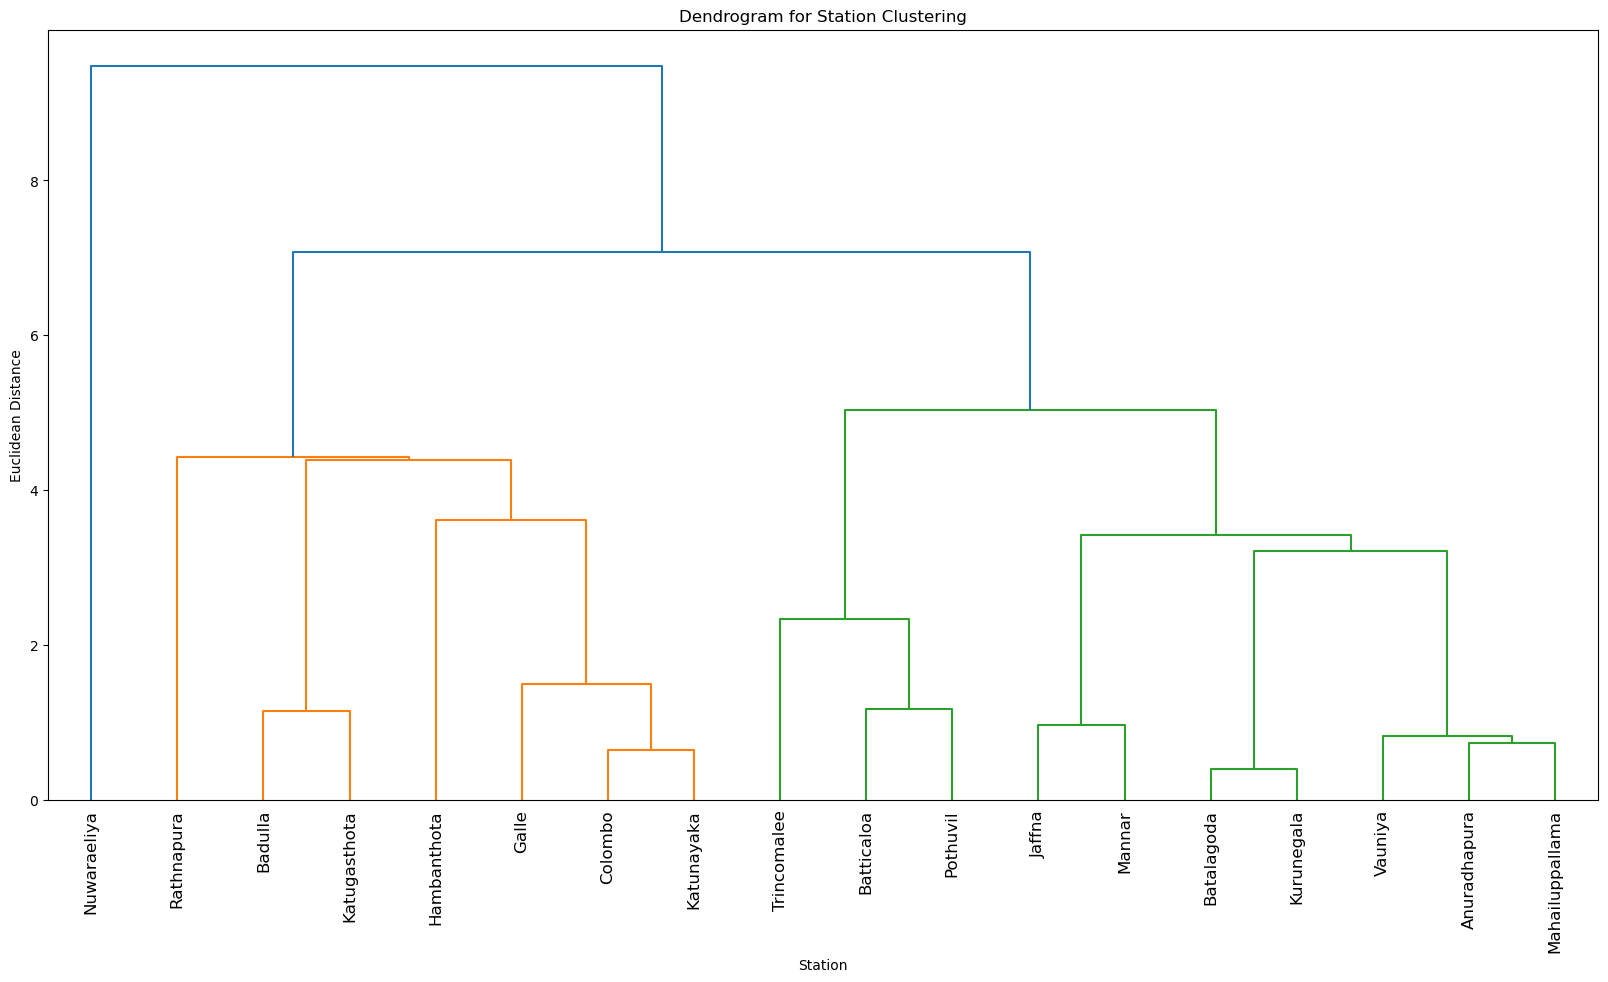

In [270]:
# Plot the Dendrogram
Z = sch.linkage(station_data_scaled, method='ward')  # Use 'ward' to minimize variance within clusters
plt.figure(figsize=(20, 10))
sch.dendrogram(Z, labels=station_data.index, orientation='top', leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram for Station Clustering')
plt.xlabel('Station')
plt.ylabel('Euclidean Distance')
plt.show()

In [271]:
# Apply Hierarchical Clustering (Agglomerative Clustering)
agg_clust = AgglomerativeClustering(n_clusters=10)  # Choose the number of clusters based on analysis
station_data['Cluster'] = agg_clust.fit_predict(station_data_scaled)

In [273]:
# Step 2: Display the stations and their assigned clusters
print(station_data[['Cluster']])

                 Cluster
Station name            
Anuradhapura           3
Badulla                5
Batalagoda             8
Batticaloa             2
Colombo                0
Galle                  0
Hambanthota            6
Jaffna                 1
Katugasthota           5
Katunayaka             0
Kurunegala             8
Mahailuppallama        3
Mannar                 1
Nuwaraeliya            7
Pothuvil               2
Rathnapura             9
Trincomalee            4
Vauniya                3


The dendrogram provides a visual representation of the Hierarchical Clustering results, showing how the stations are merged based on their similarities in climatic features. The Euclidean distance is used to measure the similarity between the stations, and the dendrogram visually depicts the distance at which clusters are formed. As observed in the dendrogram, the stations are initially grouped into small clusters and then merged into larger groups as the distance between them increases. Based on the dendrogram, a suitable threshold was chosen to cut the tree and form four distinct clusters. This grouping allows us to identify stations with similar climatic conditions, which could be used for further analysis or comparison across different regions of Sri Lanka.

### Recommendation and Conclusion

In this project, we aimed to cluster 18 weather stations in Sri Lanka based on their climatic data, including rainfall, temperature, and altitude, using Principal Component Analysis (PCA) and K-Means and Hierarchical Clustering techniques. The results of our analysis revealed that the stations could be grouped into distinct clusters based on their annual rainfall and temperature patterns, providing valuable insights into regional climatic variations across Sri Lanka.

It is recommended that further studies focus on integrating more features such as seasonal trends, wind speed, and humidity to refine the clustering and identify more specific climatic zones. 

In conclusion, the application of clustering methods and PCA to the weather station data has provided an effective way to reduce dimensionality and gain meaningful insights into the geographical and climatic patterns across Sri Lanka. By clustering stations with similar climatic conditions, this analysis serves as a useful tool for regional planning, resource allocation, and climate-related decision-making.

